In [1]:
%config IPComplete.greedy=True

In [2]:
# libraries
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# we are going to just read 15% i.e. 6300 of dataset and 
#skip rest of the training data set as it increases the computational cost
digit_train=pd.read_csv('digittrain.csv',skipfooter=33700,engine='python').as_matrix()
digit_test=pd.read_csv('digittest.csv',engine='python').as_matrix()

In [4]:
print(digit_train.shape)
print(digit_test.shape)

(8300, 785)
(28000, 784)


In [5]:
type(digit_train)

numpy.ndarray

In [6]:
X=digit_train[:,1:]
y=digit_train[:,0]
X = X.astype(np.float)
X=X/255.0
print(X[0, 134])
digit_test=digit_test.astype(np.float)
digit_test=digit_test/255.0
print(digit_test[0, 245])

0.36862745098
0.525490196078


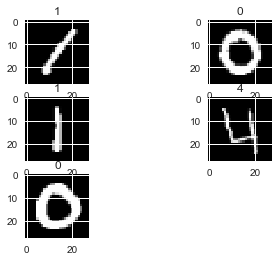

In [7]:
%matplotlib inline
plt.subplot(321)
plt.imshow(X[0].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title(y[0])
plt.subplot(322)
plt.imshow(X[1].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title(y[1])
plt.subplot(323)
plt.imshow(X[2].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title(y[2])
plt.subplot(324)
plt.imshow(X[3].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title(y[3])
plt.subplot(325)
plt.imshow(X[4].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title(y[4])

In [8]:
#folds = KFold(n_splits = 3, shuffle = True, random_state = 101)
#hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],'C': [1, 10, 100]}]
#model = SVC(kernel="rbf")
#model_cv = GridSearchCV(estimator = model,param_grid = hyper_params,scoring= 'accuracy',cv = folds,verbose = 1,return_train_score=True)      
#model_cv.fit(X, y) 

In [9]:
#cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results

In [10]:
## Using Gamma=0.01 and C=100 as GridSearchCV showed the best result with that.
##  	mean_fit_time 	mean_score_time 	mean_test_score 	mean_train_score 	param_C 	param_gamma 	params 	rank_test_score 	split0_test_score
## 9.654000 	6.811333 	0.957952 	0.999759 	10 	0.01 	{'C': 10, 'gamma': 0.01} 	1 	0.959884 	
model = SVC(kernel="rbf",gamma=0.01,C=100)
model.fit(X, y)
y_pred=model.predict(digit_test)

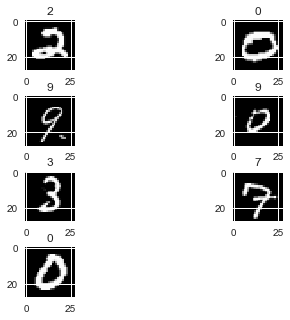

In [11]:
%matplotlib inline

plt.subplot(421)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.imshow(digit_test[0].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title(y_pred[0])
plt.subplot(422)
plt.imshow(digit_test[1].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title(y_pred[1])
plt.subplot(423)
plt.imshow(digit_test[2].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title(y_pred[2])
plt.subplot(424)
plt.imshow(digit_test[3].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title(y_pred[3])
plt.subplot(425)
plt.imshow(digit_test[4].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title(y_pred[4])
plt.subplot(426)
plt.imshow(digit_test[5].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title(y_pred[5])
plt.subplot(427)
plt.imshow(digit_test[6].reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title(y_pred[6])

In [21]:
ids=[x for x in range(1,28001,1)]
result=pd.DataFrame({'Label':y_pred},index=ids)
result.index.name='ImageId'
result.to_csv('kaggleoutput.csv')